<a href="https://colab.research.google.com/github/codeby3/searchable-encryption/blob/main/zilliz/paillier/zilliz_paillier_vector_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [1]:
!pip install -qU beir sentence-transformers pymilvus datasets phe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.1/228.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [2]:
!pip install --upgrade --quiet torch torchvision --extra-index-url https://download.pytorch.org/whl/cu118

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
from beir import util
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.evaluation import EvaluateRetrieval
import pandas as pd
from pymilvus import MilvusClient, FieldSchema, DataType, CollectionSchema, Collection
from sentence_transformers import SentenceTransformer
import torch
from google.colab import userdata
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import sys
import random

/usr/local/lib/python3.11/dist-packages/beir/util.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
sys.path.append(os.getcwd())
import paillier
from paillier import PaillierKey, encrypt_vector

In [5]:
PAILLIER_N_LENGTH = 1024 # Key length for Paillier encryption
PAILLIER_SCALING_FACTOR = 1000 # Scaling factor for float to int conversion in Paillier

In [6]:
paillier_key = paillier.generate_random_key(n_length=1024)

# Load Datasets
We're using 3 datasets from the BEIR datasets - nfcorpus, fiqa and scidocs (https://huggingface.co/datasets/BeIR/beir)

In [7]:
datasets_to_load = ["nfcorpus", "fiqa", "scidocs"]
beir_data_path = "./beir_datasets" # Local directory to store BEIR data
os.makedirs(beir_data_path, exist_ok=True)
loaded_beir_data = {}

In [8]:
for dataset_name in datasets_to_load:
    print(f"\nProcessing dataset: {dataset_name}")

    # Step 3a: Download the dataset
    url = f"https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{dataset_name}.zip"
    out_dir = os.path.join(beir_data_path, dataset_name)

    if not os.path.exists(out_dir):
        print(f"Downloading {dataset_name} from {url} to {out_dir}...")
        data_path = util.download_and_unzip(url, out_dir)
        print(f"Downloaded {dataset_name} to: {data_path}")
    else:
        print(f"Dataset {dataset_name} already exists at {out_dir}. Skipping download.")
        data_path = out_dir

    # Step 3b: Load the corpus, queries, and qrels
    try:
        corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")
        loaded_beir_data[dataset_name] = {
            "corpus": corpus,
            "queries": queries,
            "qrels": qrels
        }
        print(f"Successfully loaded data for {dataset_name}.")
        print(f"  Corpus size: {len(corpus)} documents")
        print(f"  Queries size: {len(queries)} queries")
        print(f"  Qrels size: {len(qrels)} relevance judgments")

        # Print a sample document and query to verify
        if len(corpus) > 0:
            sample_doc_id = list(corpus.keys())[0]
            print(f"  Sample corpus entry ({sample_doc_id}): {corpus[sample_doc_id]['title']} - {corpus[sample_doc_id]['text'][:100]}...")
        if len(queries) > 0:
            sample_query_id = list(queries.keys())[0]
            print(f"  Sample query entry ({sample_query_id}): {queries[sample_query_id][:100]}...")

    except Exception as e:
        print(f"Error loading {dataset_name}: {e}")


Processing dataset: nfcorpus


./beir_datasets/nfcorpus/nfcorpus.zip:   0%|          | 0.00/2.34M [00:00<?, ?iB/s]

Downloaded nfcorpus to: ./beir_datasets/nfcorpus/nfcorpus


  0%|          | 0/3633 [00:00<?, ?it/s]

Successfully loaded data for nfcorpus.
  Corpus size: 3633 documents
  Queries size: 323 queries
  Qrels size: 323 relevance judgments
  Sample corpus entry (MED-10): Statin Use and Breast Cancer Survival: A Nationwide Cohort Study from Finland - Recent studies have suggested that statins, an established drug group in the prevention of cardiovas...
  Sample query entry (PLAIN-2): Do Cholesterol Statin Drugs Cause Breast Cancer?...

Processing dataset: fiqa


./beir_datasets/fiqa/fiqa.zip:   0%|          | 0.00/17.1M [00:00<?, ?iB/s]

Downloaded fiqa to: ./beir_datasets/fiqa/fiqa


  0%|          | 0/57638 [00:00<?, ?it/s]

Successfully loaded data for fiqa.
  Corpus size: 57638 documents
  Queries size: 648 queries
  Qrels size: 648 relevance judgments
  Sample corpus entry (3):  - I'm not saying I don't like the idea of on-the-job training too, but you can't expect the company to...
  Sample query entry (8): How to deposit a cheque issued to an associate in my business into my business account?...

Processing dataset: scidocs


./beir_datasets/scidocs/scidocs.zip:   0%|          | 0.00/136M [00:00<?, ?iB/s]

Downloaded scidocs to: ./beir_datasets/scidocs/scidocs


  0%|          | 0/25657 [00:00<?, ?it/s]

Successfully loaded data for scidocs.
  Corpus size: 25657 documents
  Queries size: 1000 queries
  Qrels size: 1000 relevance judgments
  Sample corpus entry (632589828c8b9fca2c3a59e97451fde8fa7d188d): A hybrid of genetic algorithm and particle swarm optimization for recurrent network design - An evolutionary recurrent network which automates the design of recurrent neural/fuzzy networks usin...
  Sample query entry (78495383450e02c5fe817e408726134b3084905d): A Direct Search Method to solve Economic Dispatch Problem with Valve-Point Effect...


## Using subsets of data
Using Subsets of data because full data is taking infeasibly long for Paillier implementaion

In [9]:
# Using 10% of the queries as a starting point.
SUBSET_QUERY_PERCENTAGE = 0.05
RANDOM_SEED = 42 # Fixed seed for reproducibility

random.seed(RANDOM_SEED)
subset_beir_data = {}

In [10]:
for dataset_name, data in loaded_beir_data.items():
    print(f"\nCreating subset for dataset: {dataset_name}")

    corpus = data["corpus"]
    queries = data["queries"]
    qrels = data["qrels"]

    # Create a subset of queries
    num_queries_subset = int(len(queries) * SUBSET_QUERY_PERCENTAGE)
    query_ids = list(queries.keys())
    # Ensure there are queries to sample from
    if num_queries_subset > 0 and len(query_ids) >= num_queries_subset:
        subset_query_ids = set(random.sample(query_ids, num_queries_subset))
    else:
        subset_query_ids = set(query_ids) # Use all if subset is too small or percentage is 100%

    subset_queries = {qid: queries[qid] for qid in subset_query_ids}
    print(f"  Selected {len(subset_queries)} queries (out of {len(queries)})")

    # Create a corpus subset containing only relevant documents for the query subset
    # This is a better approach than random corpus sampling for ensuring evaluation is meaningful.
    relevant_corpus_ids = set()
    for qid in subset_query_ids:
        if qid in qrels:
            for doc_id, score in qrels[qid].items():
                if score > 0: # A score > 0 indicates relevance
                    relevant_corpus_ids.add(doc_id)

    # Filter the main corpus to only include these relevant documents
    subset_corpus = {cid: corpus[cid] for cid in relevant_corpus_ids if cid in corpus}
    print(f"  Selected {len(subset_corpus)} documents relevant to the query subset.")

    # Filter qrels to match the new query and corpus subsets
    subset_qrels = {}
    for qid, doc_scores in qrels.items():
        if qid in subset_query_ids: # Only consider queries in our subset
            filtered_scores = {did: score for did, score in doc_scores.items() if did in subset_corpus}
            if filtered_scores: # Only add the query if it has relevant docs in the subset
                subset_qrels[qid] = filtered_scores
    print(f"  Filtered qrels to {len(subset_qrels)} queries with relevant documents in the new corpus subset.")


    # Store the new subset data
    subset_beir_data[dataset_name] = {
        "corpus": subset_corpus,
        "queries": subset_queries,
        "qrels": subset_qrels
    }


Creating subset for dataset: nfcorpus
  Selected 16 queries (out of 323)
  Selected 713 documents relevant to the query subset.
  Filtered qrels to 16 queries with relevant documents in the new corpus subset.

Creating subset for dataset: fiqa
  Selected 32 queries (out of 648)
  Selected 100 documents relevant to the query subset.
  Filtered qrels to 32 queries with relevant documents in the new corpus subset.

Creating subset for dataset: scidocs
  Selected 50 queries (out of 1000)
  Selected 241 documents relevant to the query subset.
  Filtered qrels to 50 queries with relevant documents in the new corpus subset.


# Ingest data in Zilliz Vector DB

In [11]:
ZILLIZ_CLOUD_URI = userdata.get("ZILLIZ_ENDPOINT")
ZILLIZ_CLOUD_API_KEY = userdata.get("ZILLIZ_TOKEN")

In [12]:
zilliz_client = MilvusClient(
        uri=ZILLIZ_CLOUD_URI,
        token=ZILLIZ_CLOUD_API_KEY
    )

Using all-MiniLM-L6-v2 embedding model from HuggingFace SentenceTransformers Library. It generates embeddings of 384 dimensions.



In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
try:
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
    print(f"Model 'all-MiniLM-L6-v2' loaded successfully on {device}.")
    # Verify model output dimension (all-MiniLM-L6-v2 has 384 dimensions)
    dummy_embedding = embedding_model.encode("test sentence")
    print(f"Model output dimension: {len(dummy_embedding)}")

except Exception as e:
    print(f"Failed to load embedding model: {e}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model 'all-MiniLM-L6-v2' loaded successfully on cuda.
Model output dimension: 384


Batch ingestion

In [14]:
DIMENSION = 384 # Dimension for all-MiniLM-L6-v2
BATCH_SIZE = 64
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
ingestion_metrics = {}
PAILLIER_SCALING_FACTOR = 10**3

Note that using a GPU runtime has absolutely no effect on Paillier homomorphic operations

In [15]:
for dataset_name in subset_beir_data:
    print(f"\nProcessing Zilliz ingestion for dataset: {dataset_name}")

    # Add "paillier" to collection name
    collection_name = f"subset_beir_paillier_{dataset_name.replace('-', '_')}"

    # Define and Create Collection
    if zilliz_client.has_collection(collection_name=collection_name):
        print(f"Collection '{collection_name}' already exists. Dropping and recreating.")
        zilliz_client.drop_collection(collection_name=collection_name)

    # Storing encrypted vectors as float vectors
    fields = [
        FieldSchema(name="doc_id", dtype=DataType.VARCHAR, max_length=512, is_primary=True),
        FieldSchema(name="title", dtype=DataType.VARCHAR, max_length=512),
        FieldSchema(name="text", dtype=DataType.VARCHAR, max_length=65535),
        FieldSchema(name="vector", dtype=DataType.FLOAT_VECTOR, dim=DIMENSION) # Storing normalized encrypted values
    ]
    schema = CollectionSchema(fields, description=f"BEIR {dataset_name} documents (Paillier Encrypted)")

    print(f"Creating collection '{collection_name}'...")
    zilliz_client.create_collection(
        collection_name=collection_name,
        schema=schema,
        consistency_level="Strong"
    )
    print(f"Collection '{collection_name}' created successfully.")

    # Iterate, Embed, Prepare, and Insert
    corpus = subset_beir_data[dataset_name]["corpus"]
    doc_ids = list(corpus.keys())
    num_documents = len(doc_ids)

    start_total_ingestion = time.perf_counter()

    documents_to_embed = []
    original_titles = []
    original_texts = []

    for doc_id in doc_ids:
        title = corpus[doc_id].get("title", "")
        text = corpus[doc_id].get("text", "")
        content_to_embed = f"{title} {text}".strip()
        documents_to_embed.append(content_to_embed)
        original_titles.append(title)
        original_texts.append(text)

    print(f"Generating embeddings and inserting data for '{dataset_name}' corpus ({len(doc_ids)} documents)...")

    # Process in batches
    for i in tqdm(range(0, len(doc_ids), BATCH_SIZE), desc=f"Ingesting {dataset_name}"):
        batch_doc_ids = doc_ids[i:i + BATCH_SIZE]
        batch_contents = documents_to_embed[i:i + BATCH_SIZE]
        batch_titles = original_titles[i:i + BATCH_SIZE]
        batch_texts = original_texts[i:i + BATCH_SIZE]

        # Generate UNENCRYPTED embeddings first
        unencrypted_batch_vectors = embedding_model.encode(batch_contents, convert_to_list=True)

        # Encrypt each vector in the batch using Paillier
        encrypted_batch_vectors_normalized = []
        for vec in unencrypted_batch_vectors:
            # paillier.encrypt_vector returns an EncryptResult object
            encrypted_result = paillier.encrypt_vector(paillier_key, vec.tolist(), scaling_factor=PAILLIER_SCALING_FACTOR)
            # We store the normalized ciphertext (float list) in Zilliz
            encrypted_batch_vectors_normalized.append(encrypted_result.ciphertext)

        # Prepare entities for insertion (now with encrypted and normalized vectors)
        entities = []
        for j in range(len(batch_doc_ids)):
            entities.append({
                "doc_id": batch_doc_ids[j],
                "title": batch_titles[j],
                "text": batch_texts[j],
                "vector": encrypted_batch_vectors_normalized[j] # Store the normalized encrypted vector
            })

        # Insert the batch
        zilliz_client.insert(
            collection_name=collection_name,
            data=entities
        )

    end_total_ingestion = time.perf_counter()
    total_ingestion_time = end_total_ingestion - start_total_ingestion
    print(f"Finished inserting data for '{dataset_name}'. Total ingestion time: {total_ingestion_time:.2f} seconds")

    estimated_embedding_size_bytes = num_documents * DIMENSION * 4 # 4 bytes per float
    estimated_embedding_size_mb = estimated_embedding_size_bytes / (1024 * 1024)
    print(f"Estimated raw embedding data size for '{dataset_name}': {estimated_embedding_size_mb:.2f} MB")

    ingestion_metrics[dataset_name] = {
        "total_ingestion_time_seconds": total_ingestion_time,
        "estimated_embedding_size_mb": estimated_embedding_size_mb,
        "num_documents": num_documents
    }

    # Create HNSW Index (on encrypted and normalized vectors)
    print(f"Creating HNSW index for '{collection_name}'...")
    index_params = zilliz_client.prepare_index_params()
    index_params.add_index(
        field_name="vector",
        index_type="HNSW",
        metric_type="COSINE",
    )
    zilliz_client.create_index(
        collection_name=collection_name,
        index_params=index_params
    )
    print(f"HNSW index created for '{collection_name}'.")

    # Load collection into memory
    print(f"Loading collection '{collection_name}' into memory...")
    zilliz_client.load_collection(collection_name=collection_name)
    print(f"Collection '{collection_name}' loaded successfully.")


Processing Zilliz ingestion for dataset: nfcorpus
Creating collection 'subset_beir_paillier_nfcorpus'...
Collection 'subset_beir_paillier_nfcorpus' created successfully.
Generating embeddings and inserting data for 'nfcorpus' corpus (713 documents)...


Ingesting nfcorpus:   0%|          | 0/12 [00:00<?, ?it/s]

Finished inserting data for 'nfcorpus'. Total ingestion time: 4050.31 seconds
Estimated raw embedding data size for 'nfcorpus': 1.04 MB
Creating HNSW index for 'subset_beir_paillier_nfcorpus'...
HNSW index created for 'subset_beir_paillier_nfcorpus'.
Loading collection 'subset_beir_paillier_nfcorpus' into memory...
Collection 'subset_beir_paillier_nfcorpus' loaded successfully.

Processing Zilliz ingestion for dataset: fiqa
Creating collection 'subset_beir_paillier_fiqa'...
Collection 'subset_beir_paillier_fiqa' created successfully.
Generating embeddings and inserting data for 'fiqa' corpus (100 documents)...


Ingesting fiqa:   0%|          | 0/2 [00:00<?, ?it/s]

Finished inserting data for 'fiqa'. Total ingestion time: 566.45 seconds
Estimated raw embedding data size for 'fiqa': 0.15 MB
Creating HNSW index for 'subset_beir_paillier_fiqa'...
HNSW index created for 'subset_beir_paillier_fiqa'.
Loading collection 'subset_beir_paillier_fiqa' into memory...
Collection 'subset_beir_paillier_fiqa' loaded successfully.

Processing Zilliz ingestion for dataset: scidocs
Creating collection 'subset_beir_paillier_scidocs'...
Collection 'subset_beir_paillier_scidocs' created successfully.
Generating embeddings and inserting data for 'scidocs' corpus (241 documents)...


Ingesting scidocs:   0%|          | 0/4 [00:00<?, ?it/s]

Finished inserting data for 'scidocs'. Total ingestion time: 1363.92 seconds
Estimated raw embedding data size for 'scidocs': 0.35 MB
Creating HNSW index for 'subset_beir_paillier_scidocs'...
HNSW index created for 'subset_beir_paillier_scidocs'.
Loading collection 'subset_beir_paillier_scidocs' into memory...
Collection 'subset_beir_paillier_scidocs' loaded successfully.


# Running queries

In [16]:
QUERY_BATCH_SIZE = 10 # Process queries in batches for embedding and searching - 10 is the max allowed by Zilliz
MAX_SEARCH_RESULTS = 100 # Retrieve top 100 for max k_value

In [17]:
def get_zilliz_search_results_paillier(
    zilliz_client: MilvusClient,
    embedding_model: SentenceTransformer,
    paillier_key: PaillierKey, # Paillier key
    collection_name: str,
    queries: dict,
    top_k: int = MAX_SEARCH_RESULTS,
    paillier_scaling_factor: int = PAILLIER_SCALING_FACTOR
) -> tuple[dict, list]:
    """
    Performs vector similarity search on a Zilliz collection for given queries
    and formats results for BEIR evaluation, using Paillier encrypted queries.

    Args:
        zilliz_client: An initialized MilvusClient instance.
        embedding_model: The loaded SentenceTransformer model.
        paillier_key: The Paillier encryption key.
        collection_name: The name of the Zilliz collection to search (should be Paillier collection).
        queries: A dictionary of queries with query_id as key and query_text as value.
        top_k: The maximum number of results to retrieve per query.
        paillier_scaling_factor: The scaling factor used for Paillier encryption.

    Returns:
        A dictionary in BEIR evaluation format: {query_id: {doc_id: score, ...}}
        And a list of individual query latencies in milliseconds.
    """
    print(f"Retrieving results from '{collection_name}' for {len(queries)} queries, top_k={top_k}...")

    search_results = {}
    query_ids = list(queries.keys())
    query_texts = [queries[qid] for qid in query_ids]

    all_query_latencies_ms = []

    for i in tqdm(range(0, len(query_ids), QUERY_BATCH_SIZE), desc=f"Searching {collection_name}"):
        batch_query_ids = query_ids[i:i + QUERY_BATCH_SIZE]
        batch_query_texts = query_texts[i:i + QUERY_BATCH_SIZE]

        # Generate UNENCRYPTED embeddings for the current batch of queries
        unencrypted_batch_query_vectors = embedding_model.encode(batch_query_texts, convert_to_list=True)

        # Encrypt each query vector using Paillier
        encrypted_batch_query_vectors_normalized = []
        for vec in unencrypted_batch_query_vectors:
            encrypted_result = paillier.encrypt_vector(paillier_key, vec.tolist(), scaling_factor=paillier_scaling_factor)
            encrypted_batch_query_vectors_normalized.append(encrypted_result.ciphertext) # Use the normalized ciphertext

        search_params = {
            "metric_type": "COSINE",
            "params": {"ef": max(top_k, 128)}
        }

        start_search_call = time.perf_counter()
        try:
            # Perform the batched search in Zilliz using ENCRYPTED and NORMALIZED query vectors
            hits_per_query = zilliz_client.search(
                collection_name=collection_name,
                data=encrypted_batch_query_vectors_normalized, # Use normalized encrypted vectors
                limit=top_k,
                output_fields=["doc_id"],
                search_params=search_params
            )
            end_search_call = time.perf_counter()
            search_call_duration_ms = (end_search_call - start_search_call) * 1000

            if batch_query_ids:
                latency_per_query_in_batch = search_call_duration_ms / len(batch_query_ids)
                all_query_latencies_ms.extend([latency_per_query_in_batch] * len(batch_query_ids))

            for q_idx, query_id in enumerate(batch_query_ids):
                query_hits = {}
                for hit in hits_per_query[q_idx]:
                    query_hits[str(hit.id)] = float(hit.distance)
                search_results[str(query_id)] = query_hits

        except Exception as e:
            print(f"Error during search for batch starting with {batch_query_ids[0]}: {e}")
            continue

    print(f"Finished retrieving results from '{collection_name}'.")
    return search_results, all_query_latencies_ms

In [18]:
# Define the list of k-values for evaluation
k_values = [1, 3, 5, 10, 50, 100]

# List to store results for all datasets
all_evaluation_results = []

## Evaluating Results

In [19]:
# Loop through each dataset
for dataset_name in subset_beir_data:
    print(f"\nStarting evaluation for dataset: {dataset_name}")

    qrels = {
        str(query_id): {str(doc_id): int(score) for doc_id, score in doc_scores_dict.items()}
        for query_id, doc_scores_dict in subset_beir_data[dataset_name]["qrels"].items()
    }
    queries = subset_beir_data[dataset_name]["queries"]

    # Skip evaluation if there are no queries or qrels in the subset
    if not queries or not qrels:
        print(f"  Skipping evaluation for '{dataset_name}' as the query or qrels subset is empty.")
        continue

    corpus = subset_beir_data[dataset_name]["corpus"]

    # Use "paillier" collection name
    collection_name = f"subset_beir_paillier_{dataset_name.replace('-', '_')}"

    print(f"Retrieving search results from Zilliz for '{dataset_name}' (Paillier encrypted)...")
    # Call the Paillier-specific retriever function
    results, query_latencies_ms = get_zilliz_search_results_paillier(
        zilliz_client=zilliz_client,
        embedding_model=embedding_model,
        paillier_key=paillier_key, # Pass the Paillier key
        collection_name=collection_name,
        queries=queries,
        top_k=max(k_values),
        paillier_scaling_factor=PAILLIER_SCALING_FACTOR
    )

    if not results:
        print(f"No results retrieved for '{dataset_name}'. Skipping evaluation for this dataset.")
        continue

    print(f"Retrieved {len(results)} queries' results for '{dataset_name}'.")

    # Calculate search latency metrics (Avg, P90, P99)
    avg_search_latency_ms = 0
    p90_search_latency_ms = 0
    p99_search_latency_ms = 0

    if query_latencies_ms:
        avg_search_latency_ms = np.mean(query_latencies_ms)
        p90_search_latency_ms = np.percentile(query_latencies_ms, 90)
        p99_search_latency_ms = np.percentile(query_latencies_ms, 99)
    print(f"  Avg Search Latency: {avg_search_latency_ms:.2f} ms")
    print(f"  P90 Search Latency: {p90_search_latency_ms:.2f} ms")
    print(f"  P99 Search Latency: {p99_search_latency_ms:.2f} ms")


    print(f"Calculating evaluation metrics for '{dataset_name}'...")
    retriever_evaluator = EvaluateRetrieval()
    ndcg_scores, map_scores, recall_scores, precision_scores = retriever_evaluator.evaluate(qrels, results, k_values)

    dataset_results = {
        "Dataset": f"{dataset_name}_subset",
        "Encryption_Type": "Paillier",
        "NDCG@k": ndcg_scores,
        "MAP@k": map_scores,
        "Recall@k": recall_scores,
        "Precision@k": precision_scores,
        "Avg_Search_Latency_ms": avg_search_latency_ms,
        "P90_Search_Latency_ms": p90_search_latency_ms,
        "P99_Search_Latency_ms": p99_search_latency_ms,
        "Total_Ingestion_Time_s": ingestion_metrics[dataset_name]["total_ingestion_time_seconds"],
        "Estimated_Embedding_Size_MB": ingestion_metrics[dataset_name]["estimated_embedding_size_mb"],
        "Num_Documents": ingestion_metrics[dataset_name]["num_documents"]
    }
    all_evaluation_results.append(dataset_results)

    print(f"Evaluation for '{dataset_name}' complete.")
    ndcg_10 = dataset_results["NDCG@k"].get('NDCG@10', 'N/A')
    map_10 = dataset_results["MAP@k"].get('MAP@10', 'N/A')
    recall_100 = dataset_results["Recall@k"].get('Recall@100', 'N/A')
    precision_10 = dataset_results["Precision@k"].get('P@10', 'N/A')

    print(f"  NDCG@10: {ndcg_10:.4f}" if isinstance(ndcg_10, (int, float)) else f"  NDCG@10: {ndcg_10}")
    print(f"  MAP@10: {map_10:.4f}" if isinstance(map_10, (int, float)) else f"  MAP@10: {map_10}")
    print(f"  Recall@100: {recall_100:.4f}" if isinstance(recall_100, (int, float)) else f"  Recall@100: {recall_100}")
    print(f"  Precision@10: {precision_10:.4f}" if isinstance(precision_10, (int, float)) else f"  Precision@10: {precision_10}")


Starting evaluation for dataset: nfcorpus
Retrieving search results from Zilliz for 'nfcorpus' (Paillier encrypted)...
Retrieving results from 'subset_beir_paillier_nfcorpus' for 16 queries, top_k=100...


Searching subset_beir_paillier_nfcorpus:   0%|          | 0/2 [00:00<?, ?it/s]

Finished retrieving results from 'subset_beir_paillier_nfcorpus'.
Retrieved 16 queries' results for 'nfcorpus'.
  Avg Search Latency: 50.76 ms
  P90 Search Latency: 70.30 ms
  P99 Search Latency: 70.30 ms
Calculating evaluation metrics for 'nfcorpus'...
Evaluation for 'nfcorpus' complete.
  NDCG@10: 0.0653
  MAP@10: 0.0021
  Recall@100: 0.0997
  Precision@10: 0.0625

Starting evaluation for dataset: fiqa
Retrieving search results from Zilliz for 'fiqa' (Paillier encrypted)...
Retrieving results from 'subset_beir_paillier_fiqa' for 32 queries, top_k=100...


Searching subset_beir_paillier_fiqa:   0%|          | 0/4 [00:00<?, ?it/s]

Finished retrieving results from 'subset_beir_paillier_fiqa'.
Retrieved 32 queries' results for 'fiqa'.
  Avg Search Latency: 55.45 ms
  P90 Search Latency: 52.99 ms
  P99 Search Latency: 199.22 ms
Calculating evaluation metrics for 'fiqa'...
Evaluation for 'fiqa' complete.
  NDCG@10: 0.0625
  MAP@10: 0.0271
  Recall@100: 1.0000
  Precision@10: 0.0312

Starting evaluation for dataset: scidocs
Retrieving search results from Zilliz for 'scidocs' (Paillier encrypted)...
Retrieving results from 'subset_beir_paillier_scidocs' for 50 queries, top_k=100...


Searching subset_beir_paillier_scidocs:   0%|          | 0/5 [00:00<?, ?it/s]

Finished retrieving results from 'subset_beir_paillier_scidocs'.
Retrieved 50 queries' results for 'scidocs'.
  Avg Search Latency: 41.27 ms
  P90 Search Latency: 51.66 ms
  P99 Search Latency: 51.66 ms
Calculating evaluation metrics for 'scidocs'...
Evaluation for 'scidocs' complete.
  NDCG@10: 0.0239
  MAP@10: 0.0097
  Recall@100: 0.4120
  Precision@10: 0.0140


# Visualizing the results


--- Consolidated BEIR Evaluation Results (Paillier Encrypted) ---
           Dataset Encryption_Type    MAP@1   MAP@10  MAP@100    MAP@3    MAP@5   MAP@50   NDCG@1  NDCG@10  NDCG@100   NDCG@3   NDCG@5  NDCG@50      P@1     P@10    P@100      P@3      P@5     P@50  Recall@1  Recall@10  Recall@100  Recall@3  Recall@5  Recall@50  Total_Ingestion_Time_s  Estimated_Embedding_Size_MB  Avg_Search_Latency_ms  P90_Search_Latency_ms  P99_Search_Latency_ms  Num_Documents
0  nfcorpus_subset        Paillier  0.00020  0.00208  0.01199  0.00071  0.00131  0.00732  0.06250  0.06528   0.08900  0.06634  0.07440  0.07390  0.06250  0.06250  0.06313  0.06250  0.07500  0.06750   0.00020    0.00594      0.0997   0.00101   0.00255    0.05859             4050.314228                     1.044434              50.761843              70.304803              70.304803            713
1      fiqa_subset        Paillier  0.00625  0.02713  0.06893  0.01319  0.02069  0.05212  0.03125  0.06247   0.28429  0.03158  0.04167 

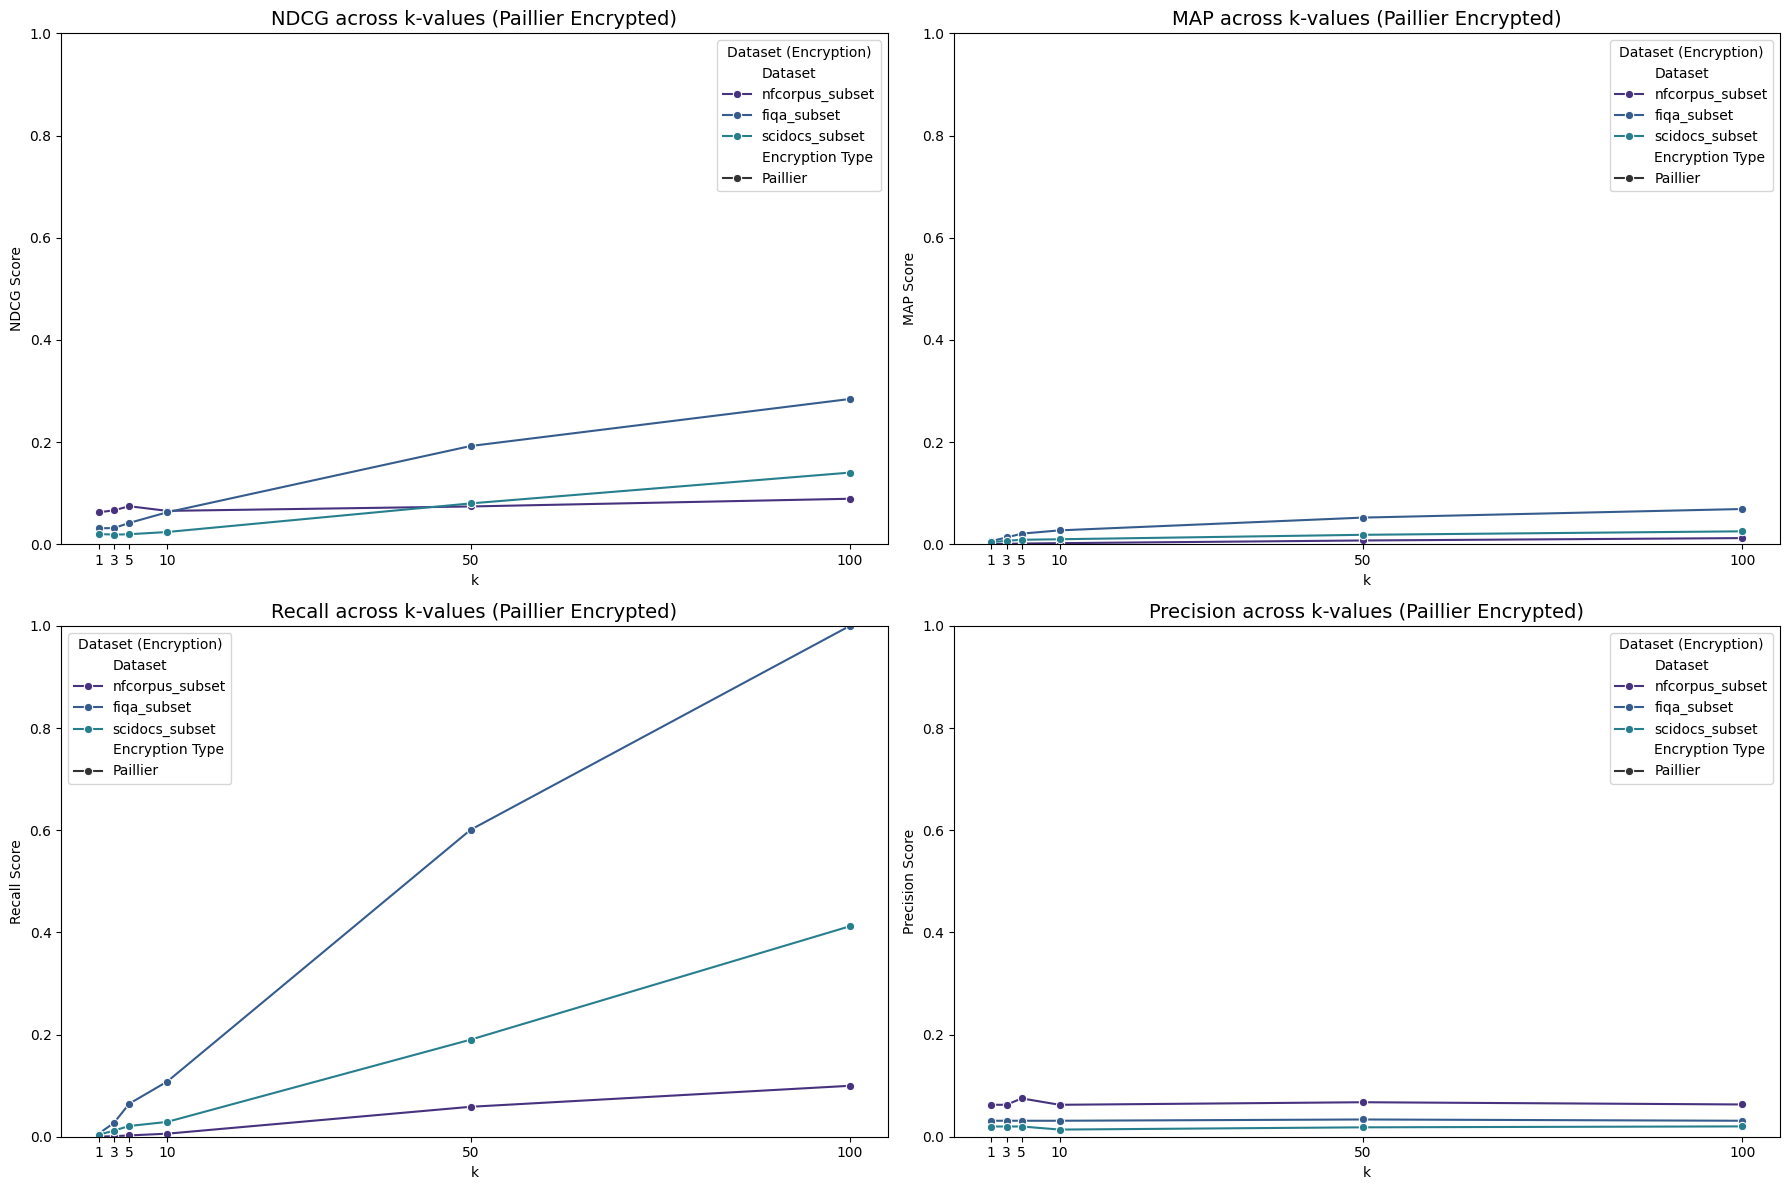

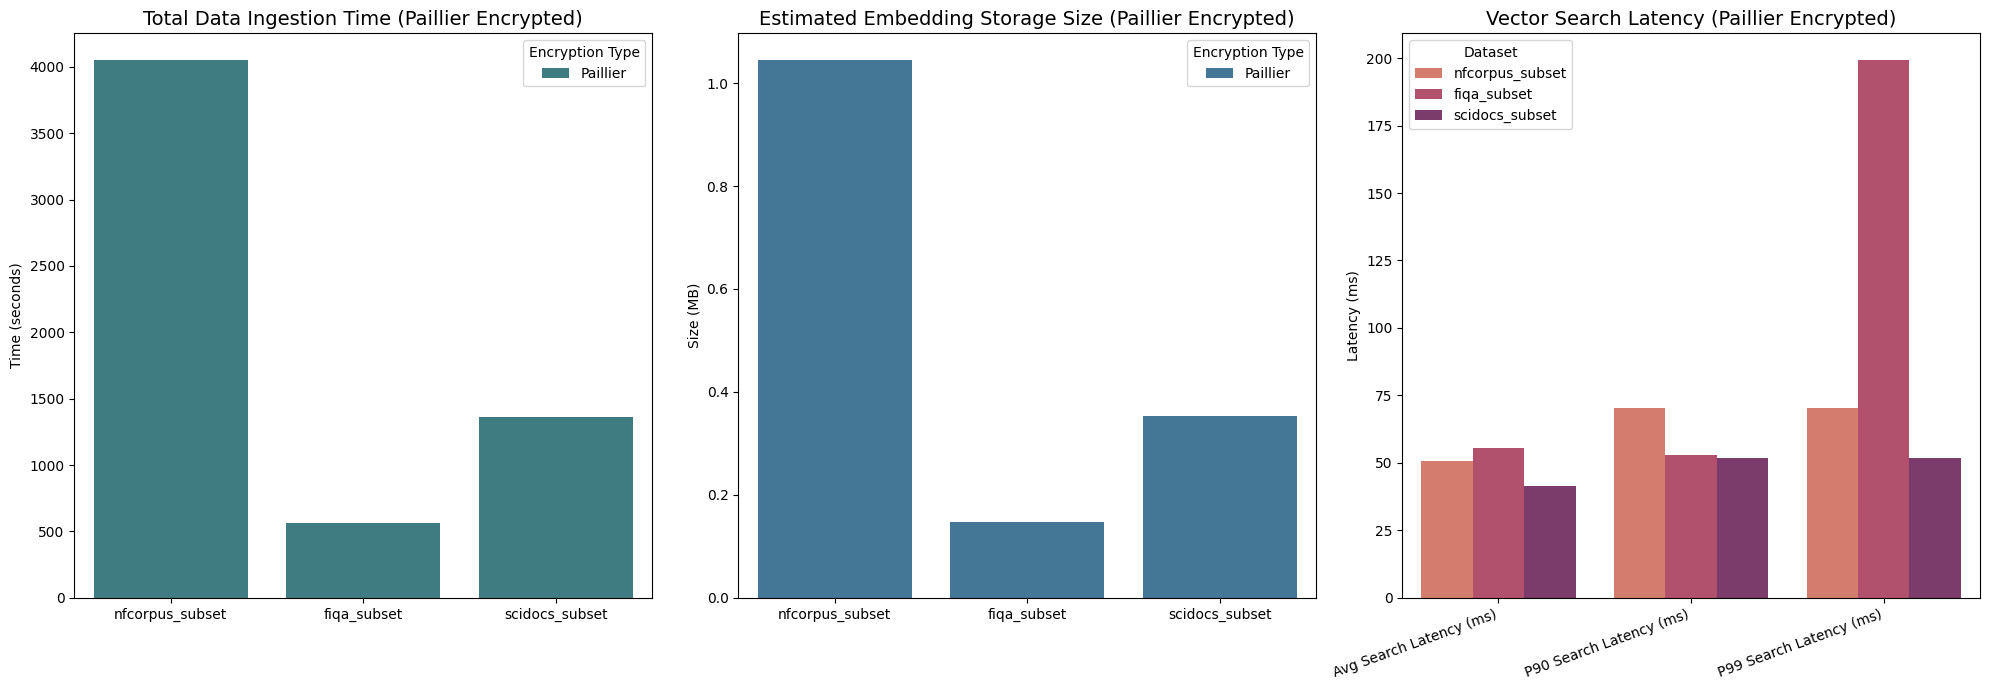

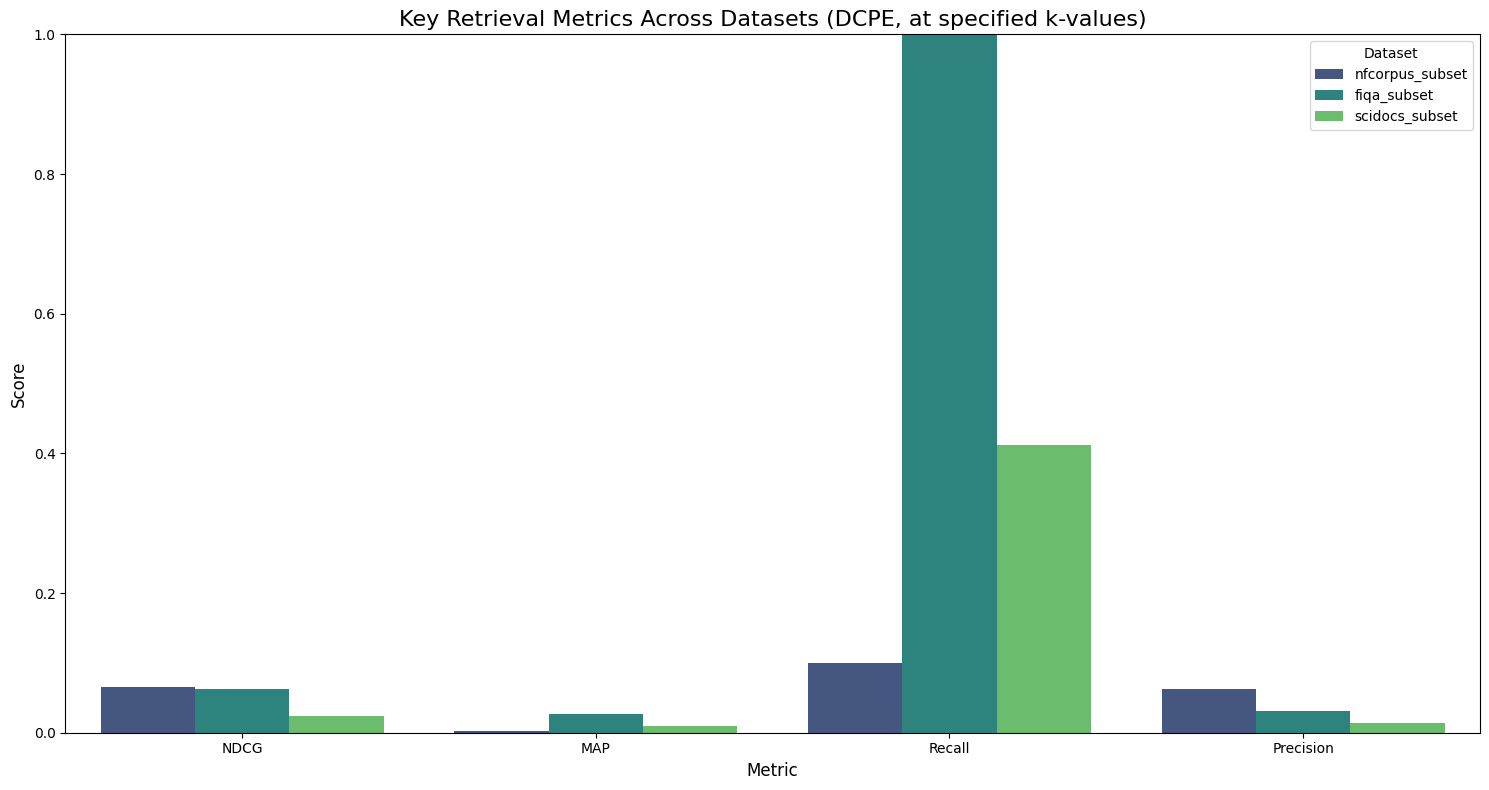

In [20]:
flattened_results = []
for dataset_result in all_evaluation_results:
    row = {"Dataset": dataset_result["Dataset"], "Encryption_Type": dataset_result["Encryption_Type"]}

    for k_value_str, score in dataset_result["NDCG@k"].items():
        row[f"{k_value_str}"] = score

    for k_value_str, score in dataset_result["MAP@k"].items():
        row[f"{k_value_str}"] = score

    for k_value_str, score in dataset_result["Recall@k"].items():
        row[f"{k_value_str}"] = score

    for k_value_str, score in dataset_result["Precision@k"].items():
        row[f"{k_value_str}"] = score

    row["Avg_Search_Latency_ms"] = dataset_result["Avg_Search_Latency_ms"]
    row["P90_Search_Latency_ms"] = dataset_result["P90_Search_Latency_ms"]
    row["P99_Search_Latency_ms"] = dataset_result["P99_Search_Latency_ms"]
    row["Total_Ingestion_Time_s"] = dataset_result["Total_Ingestion_Time_s"]
    row["Estimated_Embedding_Size_MB"] = dataset_result["Estimated_Embedding_Size_MB"]
    row["Num_Documents"] = dataset_result["Num_Documents"]

    flattened_results.append(row)

results_df = pd.DataFrame(flattened_results)

beir_metric_prefixes = ["NDCG@", "MAP@", "Recall@", "P@"]
beir_columns = sorted([col for col in results_df.columns if any(col.startswith(prefix) for prefix in beir_metric_prefixes)])
operational_columns = [
    "Total_Ingestion_Time_s", "Estimated_Embedding_Size_MB",
    "Avg_Search_Latency_ms", "P90_Search_Latency_ms", "P99_Search_Latency_ms",
    "Num_Documents"
]
ordered_columns = ['Dataset', 'Encryption_Type'] + beir_columns + operational_columns
results_df = results_df[ordered_columns]

print("\n--- Consolidated BEIR Evaluation Results (Paillier Encrypted) ---")
print(results_df.to_string())

print("\n--- Generating Comprehensive Visualizations (Paillier Encrypted) ---")

# --- BEIR Metrics Visualization (Comprehensive) ---
beir_plot_data = []
for dataset_result in all_evaluation_results:
    dataset_name = dataset_result["Dataset"]
    encryption_type = dataset_result["Encryption_Type"]
    for metric_type, scores_dict in [
        ("NDCG", dataset_result["NDCG@k"]),
        ("MAP", dataset_result["MAP@k"]),
        ("Recall", dataset_result["Recall@k"]),
        ("Precision", dataset_result["Precision@k"])
    ]:
        for k_str, score in scores_dict.items():
            k_val = int(k_str.split('@')[-1])
            beir_plot_data.append({
                "Dataset": dataset_name,
                "Encryption Type": encryption_type,
                "Metric Type": metric_type,
                "k": k_val,
                "Score": score
            })
beir_plot_df = pd.DataFrame(beir_plot_data)

if not beir_plot_df.empty:
    plt.figure(figsize=(18, 12))
    sns.set_palette("viridis")

    # The 'hue' and 'style' parameters are key for comparing different encryption types
    # If you run unencrypted, S-KNN, and Paillier results into *one* all_evaluation_results list,
    # then 'hue' will differentiate datasets, and 'style' will differentiate encryption types.
    # If you run this notebook in isolation, 'Encryption Type' will be constant ("Paillier").

    plt.subplot(2, 2, 1)
    sns.lineplot(x="k", y="Score", hue="Dataset", style="Encryption Type", data=beir_plot_df[beir_plot_df['Metric Type'] == 'NDCG'], marker='o')
    plt.title("NDCG across k-values (Paillier Encrypted)", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("NDCG Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset (Encryption)", loc='best')

    plt.subplot(2, 2, 2)
    sns.lineplot(x="k", y="Score", hue="Dataset", style="Encryption Type", data=beir_plot_df[beir_plot_df['Metric Type'] == 'MAP'], marker='o')
    plt.title("MAP across k-values (Paillier Encrypted)", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("MAP Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset (Encryption)", loc='best')

    plt.subplot(2, 2, 3)
    sns.lineplot(x="k", y="Score", hue="Dataset", style="Encryption Type", data=beir_plot_df[beir_plot_df['Metric Type'] == 'Recall'], marker='o')
    plt.title("Recall across k-values (Paillier Encrypted)", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("Recall Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset (Encryption)", loc='best')

    plt.subplot(2, 2, 4)
    sns.lineplot(x="k", y="Score", hue="Dataset", style="Encryption Type", data=beir_plot_df[beir_plot_df['Metric Type'] == 'Precision'], marker='o')
    plt.title("Precision across k-values (Paillier Encrypted)", fontsize=14)
    plt.xlabel("k", fontsize=10)
    plt.ylabel("Precision Score", fontsize=10)
    plt.ylim(0, 1.0)
    plt.xticks(k_values)
    plt.legend(title="Dataset (Encryption)", loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("No BEIR evaluation data available for plotting.")

# --- Operational Metrics Visualization ---
operational_plot_data = []
for dataset_result in all_evaluation_results:
    operational_plot_data.append({
        "Dataset": dataset_result["Dataset"],
        "Encryption Type": dataset_result["Encryption_Type"],
        "Total Ingestion Time (s)": dataset_result["Total_Ingestion_Time_s"],
        "Estimated Embedding Size (MB)": dataset_result["Estimated_Embedding_Size_MB"],
        "Avg Search Latency (ms)": dataset_result["Avg_Search_Latency_ms"],
        "P90 Search Latency (ms)": dataset_result["P90_Search_Latency_ms"],
        "P99 Search Latency (ms)": dataset_result["P99_Search_Latency_ms"]
    })
operational_df = pd.DataFrame(operational_plot_data)

if not operational_df.empty:
    plt.figure(figsize=(20, 7))

    plt.subplot(1, 3, 1)
    sns.barplot(x="Dataset", y="Total Ingestion Time (s)", hue="Encryption Type", data=operational_df, palette="crest")
    plt.title("Total Data Ingestion Time (Paillier Encrypted)", fontsize=14)
    plt.ylabel("Time (seconds)", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

    plt.subplot(1, 3, 2)
    sns.barplot(x="Dataset", y="Estimated Embedding Size (MB)", hue="Encryption Type", data=operational_df, palette="mako")
    plt.title("Estimated Embedding Storage Size (Paillier Encrypted)", fontsize=14)
    plt.ylabel("Size (MB)", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

    plt.subplot(1, 3, 3)
    latency_melted_df = operational_df.melt(id_vars=['Dataset', 'Encryption Type'],
                                            value_vars=["Avg Search Latency (ms)", "P90 Search Latency (ms)", "P99 Search Latency (ms)"],
                                            var_name="Latency Type", value_name="Latency (ms)")
    sns.barplot(x="Latency Type", y="Latency (ms)", hue="Dataset", data=latency_melted_df, palette="flare")
    plt.title("Vector Search Latency (Paillier Encrypted)", fontsize=14)
    plt.ylabel("Latency (ms)", fontsize=10)
    plt.xlabel("")
    plt.xticks(rotation=20, ha='right')
    plt.legend(title="Dataset", loc='best')
    plt.tight_layout()

    plt.tight_layout()
    plt.show()
else:
    print("No operational metrics data available for plotting.")

# --- Summary Metrics Visualization (Bar Plot for key k-values) ---
metrics_to_plot_summary = {
    "NDCG": "NDCG@10",
    "MAP": "MAP@10",
    "Recall": "Recall@100",
    "Precision": "P@10"
}

summary_plot_data = []
for index, row in results_df.iterrows():
    dataset = row['Dataset']
    for metric_name, col_name in metrics_to_plot_summary.items():
        if col_name in row:
            summary_plot_data.append({
                "Dataset": dataset,
                "Metric": metric_name,
                "Value": row[col_name],
                "K_Value": col_name.split('@')[-1]
            })

summary_plot_df = pd.DataFrame(summary_plot_data)

if not summary_plot_df.empty:
    plt.figure(figsize=(15, 8))
    sns.barplot(x="Metric", y="Value", hue="Dataset", data=summary_plot_df, palette="viridis")
    plt.title("Key Retrieval Metrics Across Datasets (DCPE, at specified k-values)", fontsize=16)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.ylim(0, 1.0)
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()
else:
    print("No summary plot data available.")